In [1]:
%matplotlib inline

# Analysis of An $AR(1)$ Model in pyMC3

Consider the following AR(1) process, initialized in the
infinite past:
$$
   y_t = \theta y_{t-1} + \epsilon_t,
$$
where $\epsilon_t \sim iid{\cal N}(0,1)$.  Suppose you'd like to learn about $\theta$ from a a sample of observations $Y^T = \{ y_0, y_1,\ldots, y_T \}$.

First, let's generate our sample.

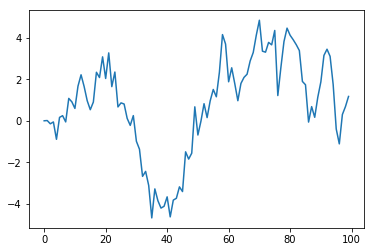

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(seed=1848)

T = 100
y = np.zeros((T,))

for i in range(1,T):
    y[i] = 0.95 * y[i-1] + np.random.normal()

plt.plot(y)

Consider the following prior for $\theta$: $\theta \sim {\cal N}(0,\tau^2)$.
We can show that the posterior distribution of $\theta$ is of the form
$$
 \theta |Y^T \sim {\cal N}( \tilde{\theta}_T, \tilde{V}_T),
$$
where
\begin{eqnarray}
        \tilde{\theta}_T &=& \left( \sum_{t=1}^T y_{t-1}^2 + \tau^{-2} \right)^{-1} \sum_{t=1}^T y_{t}y_{t-1} \\
        \tilde{V}_T      &=& \left( \sum_{t=1}^T y_{t-1}^2 + \tau^{-2} \right)^{-1}
\end{eqnarray}

In [3]:
import pymc3 as pm


tau = 1.0
with pm.Model() as ar1:
    beta = pm.Normal('beta', mu=0, sd=tau)
    data = pm.AR('y', beta, sd=1.0, observed=y)
    trace = pm.sample(100000)

100%|██████████| 100500/100500 [00:28<00:00, 3570.02it/s]

100%|█████████▉| 100164/100500 [00:28<00:00, 3617.26it/s]

 99%|█████████▉| 99801/100500 [00:27<00:00, 3619.75it/s]

 99%|█████████▉| 99437/100500 [00:27<00:00, 3612.15it/s]

 99%|█████████▊| 99071/100500 [00:27<00:00, 3651.11it/s]

 98%|█████████▊| 98704/100500 [00:27<00:00, 3646.08it/s]

 98%|█████████▊| 98333/100500 [00:27<00:00, 3619.41it/s]

 97%|█████████▋| 97968/100500 [00:27<00:00, 3645.14it/s]

 97%|█████████▋| 97599/100500 [00:27<00:00, 3684.25it/s]

 97%|█████████▋| 97228/100500 [00:27<00:00, 3703.10it/s]

 96%|█████████▋| 96855/100500 [00:27<00:00, 3694.33it/s]

 96%|█████████▌| 96482/100500 [00:27<00:01, 3721.31it/s]

 96%|█████████▌| 96104/100500 [00:26<00:01, 3700.24it/s]

 95%|█████████▌| 95730/100500 [00:26<00:01, 3730.61it/s]

 95%|█████████▍| 95349/100500 [00:26<00:01, 3702.84it/s]

 95%|█████████▍| 94976/100500 [00:26<00:01, 3693.61it/s]

 94%|█████████▍| 94606/100500 [00:26<00:01, 3695.79it/s]

 94%|█████████▍| 94236/100500 [00:26<00:01, 3695.60it/s]

 93%|█████████▎| 93864/100500 [00:26<00:01, 3717.13it/s]

 93%|█████████▎| 93485/100500 [00:26<00:01, 3686.84it/s]

 93%|█████████▎| 93112/100500 [00:26<00:02, 3670.13it/s]

 92%|█████████▏| 92743/100500 [00:26<00:02, 3680.97it/s]

 92%|█████████▏| 92367/100500 [00:25<00:02, 3651.81it/s]

 92%|█████████▏| 91991/100500 [00:25<00:02, 3608.01it/s]

 91%|█████████ | 91628/100500 [00:25<00:02, 3623.64it/s]

 91%|█████████ | 91265/100500 [00:25<00:02, 3623.44it/s]

 90%|█████████ | 90895/100500 [00:25<00:02, 3594.17it/s]

 90%|█████████ | 90534/100500 [00:25<00:02, 3591.43it/s]

 90%|████████▉ | 90166/100500 [00:25<00:02, 3560.46it/s]

 89%|████████▉ | 89807/100500 [00:25<00:03, 3550.85it/s]

 89%|████████▉ | 89447/100500 [00:25<00:03, 3531.59it/s]

 89%|████████▊ | 89093/100500 [00:25<00:03, 3529.98it/s]

 88%|████████▊ | 88735/100500 [00:24<00:03, 3571.92it/s]

 88%|████████▊ | 88375/100500 [00:24<00:03, 3588.30it/s]

 88%|████████▊ | 88012/100500 [00:24<00:03, 3570.90it/s]

 87%|████████▋ | 87654/100500 [00:24<00:03, 3573.20it/s]

 87%|████████▋ | 87288/100500 [00:24<00:03, 3656.59it/s]

 86%|████████▋ | 86918/100500 [00:24<00:03, 3690.19it/s]

 86%|████████▌ | 86542/100500 [00:24<00:03, 3663.69it/s]

 86%|████████▌ | 86165/100500 [00:24<00:03, 3626.15it/s]

 85%|████████▌ | 85799/100500 [00:24<00:04, 3616.90it/s]

 85%|████████▌ | 85436/100500 [00:24<00:04, 3620.24it/s]

 85%|████████▍ | 85071/100500 [00:23<00:04, 3648.11it/s]

 84%|████████▍ | 84702/100500 [00:23<00:04, 3634.88it/s]

 84%|████████▍ | 84336/100500 [00:23<00:04, 3629.67it/s]

 84%|████████▎ | 83968/100500 [00:23<00:04, 3615.14it/s]

 83%|████████▎ | 83601/100500 [00:23<00:04, 3593.51it/s]

 83%|████████▎ | 83238/100500 [00:23<00:04, 3581.23it/s]

 82%|████████▏ | 82876/100500 [00:23<00:04, 3611.00it/s]

 82%|████████▏ | 82513/100500 [00:23<00:04, 3627.23it/s]

 82%|████████▏ | 82143/100500 [00:23<00:05, 3599.71it/s]

 81%|████████▏ | 81779/100500 [00:22<00:05, 3630.77it/s]

 81%|████████  | 81413/100500 [00:22<00:05, 3650.74it/s]

 81%|████████  | 81043/100500 [00:22<00:05, 3631.77it/s]

 80%|████████  | 80677/100500 [00:22<00:05, 3654.75it/s]

 80%|███████▉  | 80307/100500 [00:22<00:05, 3693.25it/s]

 80%|███████▉  | 79934/100500 [00:22<00:05, 3680.17it/s]

 79%|███████▉  | 79560/100500 [00:22<00:05, 3660.19it/s]

 79%|███████▉  | 79192/100500 [00:22<00:05, 3653.45it/s]

 78%|███████▊  | 78824/100500 [00:22<00:05, 3644.00it/s]

 78%|███████▊  | 78451/100500 [00:22<00:06, 3612.03it/s]

 78%|███████▊  | 78077/100500 [00:21<00:06, 3559.97it/s]

 77%|███████▋  | 77713/100500 [00:21<00:06, 3528.27it/s]

 77%|███████▋  | 77356/100500 [00:21<00:06, 3567.47it/s]

 77%|███████▋  | 76997/100500 [00:21<00:06, 3585.41it/s]

 76%|███████▋  | 76638/100500 [00:21<00:06, 3584.69it/s]

 76%|███████▌  | 76277/100500 [00:21<00:06, 3601.59it/s]

 76%|███████▌  | 75915/100500 [00:21<00:06, 3613.72it/s]

 75%|███████▌  | 75550/100500 [00:21<00:06, 3603.37it/s]

 75%|███████▍  | 75188/100500 [00:21<00:07, 3613.55it/s]

 74%|███████▍  | 74825/100500 [00:21<00:07, 3609.06it/s]

 74%|███████▍  | 74462/100500 [00:20<00:07, 3627.98it/s]

 74%|███████▎  | 74095/100500 [00:20<00:07, 3613.11it/s]

 73%|███████▎  | 73732/100500 [00:20<00:07, 3606.70it/s]

 73%|███████▎  | 73370/100500 [00:20<00:07, 3602.14it/s]

 73%|███████▎  | 73000/100500 [00:20<00:07, 3564.37it/s]

 72%|███████▏  | 72639/100500 [00:20<00:07, 3549.09it/s]

 72%|███████▏  | 72282/100500 [00:20<00:07, 3558.75it/s]

 72%|███████▏  | 71921/100500 [00:20<00:07, 3604.77it/s]

 71%|███████   | 71554/100500 [00:20<00:07, 3661.57it/s]

 71%|███████   | 71179/100500 [00:20<00:08, 3626.81it/s]

 70%|███████   | 70812/100500 [00:19<00:08, 3612.02it/s]

 70%|███████   | 70442/100500 [00:19<00:08, 3579.04it/s]

 70%|██████▉   | 70076/100500 [00:19<00:08, 3547.46it/s]

 69%|██████▉   | 69715/100500 [00:19<00:08, 3599.57it/s]

 69%|██████▉   | 69353/100500 [00:19<00:08, 3616.98it/s]

 69%|██████▊   | 68981/100500 [00:19<00:08, 3575.73it/s]

 68%|██████▊   | 68617/100500 [00:19<00:08, 3553.90it/s]

 68%|██████▊   | 68252/100500 [00:19<00:09, 3517.29it/s]

 68%|██████▊   | 67899/100500 [00:19<00:09, 3521.26it/s]

 67%|██████▋   | 67545/100500 [00:19<00:09, 3535.53it/s]

 67%|██████▋   | 67189/100500 [00:18<00:09, 3545.94it/s]

 67%|██████▋   | 66833/100500 [00:18<00:09, 3543.05it/s]

 66%|██████▌   | 66476/100500 [00:18<00:09, 3552.13it/s]

 66%|██████▌   | 66115/100500 [00:18<00:09, 3528.24it/s]

 65%|██████▌   | 65748/100500 [00:18<00:10, 3474.43it/s]

 65%|██████▌   | 65381/100500 [00:18<00:10, 3396.95it/s]

 65%|██████▍   | 65029/100500 [00:18<00:10, 3347.46it/s]

 64%|██████▍   | 64677/100500 [00:18<00:10, 3503.27it/s]

 64%|██████▍   | 64315/100500 [00:18<00:10, 3616.57it/s]

 64%|██████▎   | 63950/100500 [00:18<00:10, 3643.47it/s]

 63%|██████▎   | 63578/100500 [00:17<00:10, 3611.69it/s]

 63%|██████▎   | 63212/100500 [00:17<00:10, 3596.47it/s]

 63%|██████▎   | 62851/100500 [00:17<00:10, 3591.87it/s]

 62%|██████▏   | 62486/100500 [00:17<00:10, 3570.81it/s]

 62%|██████▏   | 62126/100500 [00:17<00:10, 3562.24it/s]

 61%|██████▏   | 61767/100500 [00:17<00:10, 3586.96it/s]

 61%|██████    | 61407/100500 [00:17<00:10, 3595.19it/s]

 61%|██████    | 61042/100500 [00:17<00:11, 3577.35it/s]

 60%|██████    | 60667/100500 [00:17<00:11, 3509.20it/s]

 60%|██████    | 60315/100500 [00:17<00:11, 3517.33it/s]

 60%|█████▉    | 59961/100500 [00:16<00:11, 3531.51it/s]

 59%|█████▉    | 59605/100500 [00:16<00:11, 3555.68it/s]

 59%|█████▉    | 59244/100500 [00:16<00:11, 3604.94it/s]

 59%|█████▊    | 58881/100500 [00:16<00:11, 3628.61it/s]

 58%|█████▊    | 58517/100500 [00:16<00:11, 3637.44it/s]

 58%|█████▊    | 58152/100500 [00:16<00:11, 3635.09it/s]

 57%|█████▋    | 57785/100500 [00:16<00:11, 3664.46it/s]

 57%|█████▋    | 57418/100500 [00:16<00:11, 3663.24it/s]

 57%|█████▋    | 57051/100500 [00:16<00:11, 3664.71it/s]

 56%|█████▋    | 56680/100500 [00:15<00:11, 3700.38it/s]

 56%|█████▌    | 56308/100500 [00:15<00:11, 3711.27it/s]

 56%|█████▌    | 55935/100500 [00:15<00:12, 3703.53it/s]

 55%|█████▌    | 55555/100500 [00:15<00:12, 3664.85it/s]

 55%|█████▍    | 55185/100500 [00:15<00:12, 3651.11it/s]

 55%|█████▍    | 54816/100500 [00:15<00:12, 3634.83it/s]

 54%|█████▍    | 54451/100500 [00:15<00:12, 3647.44it/s]

 54%|█████▍    | 54083/100500 [00:15<00:12, 3670.34it/s]

 53%|█████▎    | 53715/100500 [00:15<00:12, 3667.74it/s]

 53%|█████▎    | 53342/100500 [00:15<00:12, 3644.59it/s]

 53%|█████▎    | 52970/100500 [00:14<00:13, 3615.12it/s]

 52%|█████▏    | 52607/100500 [00:14<00:13, 3621.72it/s]

 52%|█████▏    | 52243/100500 [00:14<00:13, 3629.09it/s]

 52%|█████▏    | 51876/100500 [00:14<00:13, 3662.98it/s]

 51%|█████     | 51500/100500 [00:14<00:13, 3627.65it/s]

 51%|█████     | 51136/100500 [00:14<00:13, 3628.60it/s]

 51%|█████     | 50758/100500 [00:14<00:13, 3568.95it/s]

 50%|█████     | 50397/100500 [00:14<00:13, 3602.46it/s]

 50%|████▉     | 50033/100500 [00:14<00:13, 3628.69it/s]

 49%|████▉     | 49667/100500 [00:14<00:13, 3651.89it/s]

 49%|████▉     | 49298/100500 [00:13<00:13, 3684.32it/s]

 49%|████▊     | 48924/100500 [00:13<00:14, 3664.40it/s]

 48%|████▊     | 48548/100500 [00:13<00:14, 3627.30it/s]

 48%|████▊     | 48170/100500 [00:13<00:14, 3565.77it/s]

 48%|████▊     | 47812/100500 [00:13<00:14, 3569.80it/s]

 47%|████▋     | 47454/100500 [00:13<00:14, 3574.11it/s]

 47%|████▋     | 47090/100500 [00:13<00:14, 3632.87it/s]

 46%|████▋     | 46716/100500 [00:13<00:14, 3592.34it/s]

 46%|████▌     | 46354/100500 [00:13<00:15, 3582.03it/s]

 46%|████▌     | 45991/100500 [00:13<00:15, 3565.96it/s]

 45%|████▌     | 45627/100500 [00:12<00:15, 3635.27it/s]

 45%|████▌     | 45261/100500 [00:12<00:15, 3653.64it/s]

 45%|████▍     | 44894/100500 [00:12<00:15, 3663.27it/s]

 44%|████▍     | 44526/100500 [00:12<00:15, 3671.51it/s]

 44%|████▍     | 44155/100500 [00:12<00:15, 3661.16it/s]

 44%|████▎     | 43780/100500 [00:12<00:15, 3624.55it/s]

 43%|████▎     | 43408/100500 [00:12<00:15, 3586.69it/s]

 43%|████▎     | 43048/100500 [00:12<00:15, 3597.91it/s]

 42%|████▏     | 42684/100500 [00:12<00:16, 3584.95it/s]

 42%|████▏     | 42325/100500 [00:12<00:16, 3583.63it/s]

 42%|████▏     | 41964/100500 [00:11<00:16, 3605.43it/s]

 41%|████▏     | 41602/100500 [00:11<00:16, 3607.97it/s]

 41%|████      | 41236/100500 [00:11<00:16, 3652.41it/s]

 41%|████      | 40850/100500 [00:11<00:16, 3571.57it/s]

 40%|████      | 40489/100500 [00:11<00:16, 3604.69it/s]

 40%|███▉      | 40128/100500 [00:11<00:16, 3603.60it/s]

 40%|███▉      | 39760/100500 [00:11<00:16, 3575.43it/s]

 39%|███▉      | 39399/100500 [00:11<00:17, 3563.71it/s]

 39%|███▉      | 39039/100500 [00:11<00:17, 3584.02it/s]

 38%|███▊      | 38663/100500 [00:11<00:17, 3517.00it/s]

 38%|███▊      | 38307/100500 [00:10<00:17, 3502.30it/s]

 38%|███▊      | 37946/100500 [00:10<00:17, 3601.81it/s]

 37%|███▋      | 37576/100500 [00:10<00:17, 3562.27it/s]

 37%|███▋      | 37206/100500 [00:10<00:18, 3509.38it/s]

 37%|███▋      | 36854/100500 [00:10<00:18, 3516.25it/s]

 36%|███▋      | 36500/100500 [00:10<00:18, 3507.79it/s]

 36%|███▌      | 36141/100500 [00:10<00:17, 3581.91it/s]

 36%|███▌      | 35782/100500 [00:10<00:18, 3587.83it/s]

 35%|███▌      | 35421/100500 [00:10<00:18, 3579.91it/s]

 35%|███▍      | 35061/100500 [00:10<00:18, 3595.68it/s]

 35%|███▍      | 34699/100500 [00:09<00:18, 3590.10it/s]

 34%|███▍      | 34335/100500 [00:09<00:18, 3572.76it/s]

 34%|███▍      | 33976/100500 [00:09<00:18, 3565.62it/s]

 33%|███▎      | 33617/100500 [00:09<00:18, 3581.21it/s]

 33%|███▎      | 33256/100500 [00:09<00:18, 3602.51it/s]

 33%|███▎      | 32882/100500 [00:09<00:19, 3550.73it/s]

 32%|███▏      | 32523/100500 [00:09<00:19, 3574.94it/s]

 32%|███▏      | 32161/100500 [00:09<00:18, 3612.21it/s]

 32%|███▏      | 31777/100500 [00:09<00:19, 3523.28it/s]

 31%|███▏      | 31419/100500 [00:09<00:19, 3578.06it/s]

 31%|███       | 31059/100500 [00:08<00:19, 3572.21it/s]

 31%|███       | 30700/100500 [00:08<00:19, 3565.26it/s]

 30%|███       | 30339/100500 [00:08<00:19, 3597.57it/s]

 30%|██▉       | 29974/100500 [00:08<00:19, 3646.44it/s]

 29%|██▉       | 29605/100500 [00:08<00:19, 3683.42it/s]

 29%|██▉       | 29231/100500 [00:08<00:19, 3661.66it/s]

 29%|██▊       | 28863/100500 [00:08<00:19, 3659.25it/s]

 28%|██▊       | 28492/100500 [00:08<00:19, 3638.39it/s]

 28%|██▊       | 28119/100500 [00:08<00:20, 3603.31it/s]

 28%|██▊       | 27757/100500 [00:07<00:20, 3612.26it/s]

 27%|██▋       | 27385/100500 [00:07<00:20, 3570.74it/s]

 27%|██▋       | 27020/100500 [00:07<00:20, 3540.26it/s]

 27%|██▋       | 26653/100500 [00:07<00:21, 3491.23it/s]

 26%|██▌       | 26293/100500 [00:07<00:21, 3446.96it/s]

 26%|██▌       | 25940/100500 [00:07<00:21, 3520.67it/s]

 25%|██▌       | 25584/100500 [00:07<00:21, 3557.75it/s]

 25%|██▌       | 25226/100500 [00:07<00:21, 3571.77it/s]

 25%|██▍       | 24866/100500 [00:07<00:21, 3591.10it/s]

 24%|██▍       | 24506/100500 [00:07<00:21, 3594.43it/s]

 24%|██▍       | 24143/100500 [00:06<00:21, 3619.06it/s]

 24%|██▎       | 23779/100500 [00:06<00:21, 3613.19it/s]

 23%|██▎       | 23397/100500 [00:06<00:21, 3536.51it/s]

 23%|██▎       | 23041/100500 [00:06<00:21, 3527.23it/s]

 23%|██▎       | 22671/100500 [00:06<00:22, 3458.07it/s]

 22%|██▏       | 22319/100500 [00:06<00:22, 3508.49it/s]

 22%|██▏       | 21964/100500 [00:06<00:22, 3493.59it/s]

 22%|██▏       | 21609/100500 [00:06<00:22, 3538.29it/s]

 21%|██        | 21248/100500 [00:06<00:22, 3510.92it/s]

 21%|██        | 20884/100500 [00:06<00:23, 3458.73it/s]

 20%|██        | 20533/100500 [00:05<00:23, 3438.38it/s]

 20%|██        | 20170/100500 [00:05<00:23, 3366.13it/s]

 20%|█▉        | 19814/100500 [00:05<00:24, 3290.61it/s]

 19%|█▉        | 19480/100500 [00:05<00:24, 3269.90it/s]

 19%|█▉        | 19148/100500 [00:05<00:24, 3264.82it/s]

 19%|█▊        | 18794/100500 [00:05<00:23, 3510.63it/s]

 18%|█▊        | 18435/100500 [00:05<00:23, 3477.80it/s]

 18%|█▊        | 18060/100500 [00:05<00:24, 3376.95it/s]

 18%|█▊        | 17699/100500 [00:05<00:25, 3288.24it/s]

 17%|█▋        | 17348/100500 [00:05<00:23, 3495.84it/s]

 17%|█▋        | 16991/100500 [00:04<00:23, 3548.65it/s]

 17%|█▋        | 16619/100500 [00:04<00:24, 3484.70it/s]

 16%|█▌        | 16246/100500 [00:04<00:24, 3392.10it/s]

 16%|█▌        | 15903/100500 [00:04<00:25, 3378.40it/s]

 15%|█▌        | 15552/100500 [00:04<00:24, 3493.97it/s]

 15%|█▌        | 15193/100500 [00:04<00:23, 3586.69it/s]

 15%|█▍        | 14830/100500 [00:04<00:23, 3572.82it/s]

 14%|█▍        | 14469/100500 [00:04<00:23, 3603.00it/s]

 14%|█▍        | 14104/100500 [00:04<00:23, 3642.81it/s]

 14%|█▎        | 13737/100500 [00:03<00:23, 3663.64it/s]

 13%|█▎        | 13357/100500 [00:03<00:24, 3610.98it/s]

 13%|█▎        | 12987/100500 [00:03<00:24, 3577.50it/s]

 13%|█▎        | 12624/100500 [00:03<00:24, 3559.04it/s]

 12%|█▏        | 12262/100500 [00:03<00:24, 3534.98it/s]

 12%|█▏        | 11907/100500 [00:03<00:25, 3529.37it/s]

 11%|█▏        | 11543/100500 [00:03<00:24, 3634.15it/s]

 11%|█         | 11161/100500 [00:03<00:25, 3563.93it/s]

 11%|█         | 10801/100500 [00:03<00:25, 3552.82it/s]

 10%|█         | 10435/100500 [00:03<00:25, 3509.92it/s]

 10%|█         | 10079/100500 [00:02<00:25, 3549.00it/s]

 10%|▉         | 9722/100500 [00:02<00:25, 3545.81it/s]

  9%|▉         | 9365/100500 [00:02<00:25, 3536.78it/s]

  9%|▉         | 9009/100500 [00:02<00:25, 3551.26it/s]

  9%|▊         | 8652/100500 [00:02<00:25, 3561.85it/s]

  8%|▊         | 8292/100500 [00:02<00:25, 3593.62it/s]

  8%|▊         | 7929/100500 [00:02<00:25, 3579.22it/s]

  8%|▊         | 7561/100500 [00:02<00:26, 3542.67it/s]

  7%|▋         | 7192/100500 [00:02<00:26, 3483.73it/s]

  7%|▋         | 6842/100500 [00:02<00:26, 3484.14it/s]

  6%|▋         | 6484/100500 [00:01<00:27, 3447.27it/s]

  6%|▌         | 6117/100500 [00:01<00:28, 3362.00it/s]

  6%|▌         | 5760/100500 [00:01<00:28, 3282.46it/s]

  5%|▌         | 5428/100500 [00:01<00:28, 3283.82it/s]

  5%|▌         | 5088/100500 [00:01<00:28, 3355.65it/s]

  5%|▍         | 4733/100500 [00:01<00:29, 3280.43it/s]

  4%|▍         | 4364/100500 [00:01<00:30, 3133.35it/s]

  4%|▍         | 3997/100500 [00:01<00:32, 2949.12it/s]

  4%|▎         | 3693/100500 [00:01<00:33, 2914.96it/s]

  3%|▎         | 3372/100500 [00:01<00:29, 3286.60it/s]

  3%|▎         | 3041/100500 [00:00<00:29, 3276.81it/s]

  3%|▎         | 2723/100500 [00:00<00:29, 3322.45it/s]

  2%|▏         | 2392/100500 [00:00<00:29, 3330.01it/s]

  2%|▏         | 2069/100500 [00:00<00:29, 3375.61it/s]

  2%|▏         | 1735/100500 [00:00<00:29, 3394.73it/s]

  1%|▏         | 1403/100500 [00:00<00:28, 3429.52it/s]

  1%|          | 1024/100500 [00:00<00:30, 3300.25it/s]

  1%|          | 664/100500 [00:00<00:31, 3188.14it/s]

  0%|          | 304/100500 [00:00<00:32, 3039.48it/s]

  0%|          | 0/100500 [00:00<?, ?it/s]

Interrupted at 9,700 [4%]: Average Loss = 222.3



Convergence archived at 9700


Average Loss = 145.53:   5%|▍         | 9328/200000 [00:00<00:10, 18693.87it/s]

Average Loss = 152.71:   4%|▎         | 7471/200000 [00:00<00:10, 18749.29it/s]

Average Loss = 170.45:   3%|▎         | 5581/200000 [00:00<00:10, 18708.18it/s]

Average Loss = 213.93:   2%|▏         | 3708/200000 [00:00<00:10, 18703.82it/s]

Average Loss = 352.11:   1%|          | 1898/200000 [00:00<00:10, 18976.85it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

Initializing NUTS using ADVI...


Auto-assigning NUTS sampler...


In [4]:
mup = ((y[:-1]**2).sum() + tau**-2)**-1 * np.dot(y[:-1],y[1:])
Vp =  ((y[:-1]**2).sum() + tau**-2)**-1
print('Mean: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].mean(), mup))
print('Std: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].std(), np.sqrt(Vp)))

Mean: 0.925 (exact = 0.925)
Std: 0.040 (exact = 0.040)


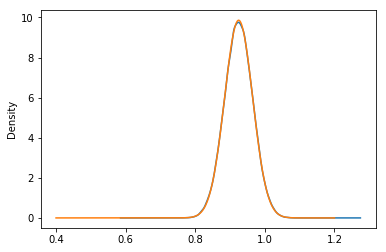

In [6]:
import pandas as p
from scipy.stats import norm
ax=p.Series(trace['beta']).plot(kind='kde')
xgrid = np.linspace(0.4, 1.2, 1000)
fgrid = norm(loc=mup, scale=np.sqrt(Vp)).pdf(xgrid)
ax.plot(xgrid,fgrid)

## Extension to AR(p)
We can instead estimate an AR(2) model using pyMC3.
$$
 y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \epsilon_t.
$$
The `AR` distribution infers the order of the process by size the of `rho` argmument passed to `AR`. 

In [8]:
with pm.Model() as ar2:
    beta = pm.Normal('beta', mu=0, sd=tau, shape=2)
    data = pm.AR('y', beta, sd=1.0, observed=y)
    trace = pm.sample(1000)

100%|██████████| 1500/1500 [00:00<00:00, 1870.80it/s]

 89%|████████▉ | 1335/1500 [00:00<00:00, 1916.05it/s]

 75%|███████▌  | 1131/1500 [00:00<00:00, 1867.55it/s]

 62%|██████▏   | 930/1500 [00:00<00:00, 1818.02it/s]

 49%|████▉     | 732/1500 [00:00<00:00, 1760.61it/s]

 36%|███▌      | 543/1500 [00:00<00:00, 1714.55it/s]

 23%|██▎       | 347/1500 [00:00<00:00, 1628.92it/s]

 10%|█         | 153/1500 [00:00<00:00, 1524.26it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

Interrupted at 10,500 [5%]: Average Loss = 261.27



Convergence archived at 10500


Average Loss = 164.17:   5%|▍         | 9117/200000 [00:00<00:10, 18213.38it/s]

Average Loss = 183.97:   4%|▎         | 7237/200000 [00:00<00:10, 17977.74it/s]

Average Loss = 218.07:   3%|▎         | 5366/200000 [00:00<00:11, 17682.37it/s]

Average Loss = 285.47:   2%|▏         | 3578/200000 [00:00<00:11, 17600.48it/s]

Average Loss = 441.06:   1%|          | 1722/200000 [00:00<00:11, 17219.52it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

Initializing NUTS using ADVI...


Auto-assigning NUTS sampler...


You can also pass the set of AR parameters as a list. 

In [9]:
with pm.Model() as ar2:
    beta = pm.Normal('beta', mu=0, sd=tau)
    beta2 = pm.Uniform('beta2')
    data = pm.AR('y', [beta, beta2], sd=1.0, observed=y)
    trace = pm.sample(10000)

100%|██████████| 10500/10500 [00:07<00:00, 1413.91it/s]

 99%|█████████▉| 10432/10500 [00:07<00:00, 1398.77it/s]

 98%|█████████▊| 10285/10500 [00:07<00:00, 1372.63it/s]

 97%|█████████▋| 10140/10500 [00:07<00:00, 1345.19it/s]

 95%|█████████▌| 10002/10500 [00:07<00:00, 1332.08it/s]

 94%|█████████▍| 9862/10500 [00:06<00:00, 1387.89it/s]

 93%|█████████▎| 9716/10500 [00:06<00:00, 1446.67it/s]

 91%|█████████ | 9562/10500 [00:06<00:00, 1412.03it/s]

 90%|████████▉ | 9418/10500 [00:06<00:00, 1427.47it/s]

 88%|████████▊ | 9271/10500 [00:06<00:00, 1460.17it/s]

 87%|████████▋ | 9121/10500 [00:06<00:00, 1443.89it/s]

 85%|████████▌ | 8974/10500 [00:06<00:01, 1468.09it/s]

 84%|████████▍ | 8825/10500 [00:06<00:01, 1488.10it/s]

 83%|████████▎ | 8670/10500 [00:06<00:01, 1465.29it/s]

 81%|████████  | 8521/10500 [00:06<00:01, 1461.37it/s]

 80%|███████▉  | 8371/10500 [00:05<00:01, 1447.86it/s]

 78%|███████▊  | 8223/10500 [00:05<00:01, 1435.15it/s]

 77%|███████▋  | 8076/10500 [00:05<00:01, 1464.93it/s]

 75%|███████▌  | 7927/10500 [00:05<00:01, 1457.45it/s]

 74%|███████▍  | 7778/10500 [00:05<00:01, 1449.20it/s]

 73%|███████▎  | 7631/10500 [00:05<00:01, 1445.98it/s]

 71%|███████▏  | 7482/10500 [00:05<00:02, 1429.69it/s]

 70%|██████▉   | 7335/10500 [00:05<00:02, 1464.99it/s]

 68%|██████▊   | 7188/10500 [00:05<00:02, 1465.89it/s]

 67%|██████▋   | 7036/10500 [00:04<00:02, 1446.04it/s]

 66%|██████▌   | 6890/10500 [00:04<00:02, 1457.70it/s]

 64%|██████▍   | 6736/10500 [00:04<00:02, 1428.40it/s]

 63%|██████▎   | 6592/10500 [00:04<00:02, 1434.86it/s]

 61%|██████▏   | 6448/10500 [00:04<00:02, 1434.17it/s]

 60%|██████    | 6302/10500 [00:04<00:02, 1424.99it/s]

 59%|█████▊    | 6158/10500 [00:04<00:03, 1429.44it/s]

 57%|█████▋    | 6013/10500 [00:04<00:03, 1421.79it/s]

 56%|█████▌    | 5867/10500 [00:04<00:03, 1451.09it/s]

 54%|█████▍    | 5720/10500 [00:04<00:03, 1447.44it/s]

 53%|█████▎    | 5574/10500 [00:03<00:03, 1453.99it/s]

 52%|█████▏    | 5423/10500 [00:03<00:03, 1435.63it/s]

 50%|█████     | 5277/10500 [00:03<00:03, 1428.04it/s]

 49%|████▉     | 5132/10500 [00:03<00:03, 1439.13it/s]

 47%|████▋     | 4986/10500 [00:03<00:03, 1441.85it/s]

 46%|████▌     | 4832/10500 [00:03<00:04, 1406.21it/s]

 45%|████▍     | 4681/10500 [00:03<00:04, 1370.94it/s]

 43%|████▎     | 4542/10500 [00:03<00:04, 1377.80it/s]

 42%|████▏     | 4402/10500 [00:03<00:04, 1387.49it/s]

 41%|████      | 4258/10500 [00:03<00:04, 1434.49it/s]

 39%|███▉      | 4113/10500 [00:02<00:04, 1430.99it/s]

 38%|███▊      | 3968/10500 [00:02<00:04, 1446.48it/s]

 36%|███▋      | 3822/10500 [00:02<00:04, 1441.10it/s]

 35%|███▍      | 3674/10500 [00:02<00:04, 1427.43it/s]

 33%|███▎      | 3517/10500 [00:02<00:05, 1380.25it/s]

 32%|███▏      | 3378/10500 [00:02<00:05, 1380.14it/s]

 31%|███       | 3237/10500 [00:02<00:05, 1372.84it/s]

 29%|██▉       | 3092/10500 [00:02<00:05, 1345.74it/s]

 28%|██▊       | 2951/10500 [00:02<00:05, 1404.14it/s]

 27%|██▋       | 2810/10500 [00:02<00:05, 1407.15it/s]

 25%|██▌       | 2668/10500 [00:01<00:05, 1406.67it/s]

 24%|██▍       | 2524/10500 [00:01<00:05, 1429.47it/s]

 23%|██▎       | 2377/10500 [00:01<00:05, 1414.73it/s]

 21%|██▏       | 2233/10500 [00:01<00:05, 1428.90it/s]

 20%|█▉        | 2082/10500 [00:01<00:06, 1397.84it/s]

 18%|█▊        | 1938/10500 [00:01<00:06, 1422.57it/s]

 17%|█▋        | 1793/10500 [00:01<00:06, 1434.72it/s]

 16%|█▌        | 1640/10500 [00:01<00:06, 1397.99it/s]

 14%|█▍        | 1498/10500 [00:01<00:06, 1389.14it/s]

 13%|█▎        | 1355/10500 [00:01<00:06, 1373.84it/s]

 11%|█▏        | 1206/10500 [00:00<00:06, 1330.52it/s]

 10%|█         | 1060/10500 [00:00<00:07, 1282.34it/s]

  9%|▉         | 920/10500 [00:00<00:07, 1238.72it/s]

  7%|▋         | 772/10500 [00:00<00:08, 1159.41it/s]

  6%|▌         | 625/10500 [00:00<00:09, 1064.80it/s]

  5%|▍         | 483/10500 [00:00<00:10, 965.03it/s]

  3%|▎         | 338/10500 [00:00<00:12, 844.44it/s]

  2%|▏         | 208/10500 [00:00<00:14, 734.99it/s]

  1%|          | 61/10500 [00:00<00:17, 606.03it/s]

  0%|          | 0/10500 [00:00<?, ?it/s]

Interrupted at 15,500 [7%]: Average Loss = 178.97



Convergence archived at 15500


Average Loss = 143.03:   7%|▋         | 14343/200000 [00:00<00:11, 16071.53it/s]

Average Loss = 145:   6%|▋         | 12734/200000 [00:00<00:11, 16064.61it/s]   

Average Loss = 147.67:   6%|▌         | 11092/200000 [00:00<00:11, 15922.68it/s]

Average Loss = 152.08:   5%|▍         | 9509/200000 [00:00<00:11, 15968.12it/s]

Average Loss = 159.06:   4%|▍         | 7883/200000 [00:00<00:12, 15848.23it/s]

Average Loss = 169.21:   3%|▎         | 6257/200000 [00:00<00:12, 15683.02it/s]

Average Loss = 191:   2%|▏         | 4669/200000 [00:00<00:12, 15602.28it/s]   

Average Loss = 217.01:   2%|▏         | 3222/200000 [00:00<00:12, 16143.70it/s]

Average Loss = 277.66:   1%|          | 1621/200000 [00:00<00:12, 16202.95it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

Initializing NUTS using ADVI...


Auto-assigning NUTS sampler...
